In [1]:
%matplotlib inline
import numpy as np
import struct as st
import matplotlib.pyplot as plt

In [2]:
file_test_x = 't10k-images.idx3-ubyte'
file_test_y = 't10k-labels.idx1-ubyte'
file_train_x = 'train-images.idx3-ubyte'
file_train_y = 'train-labels.idx1-ubyte'

In [3]:
def read_labels(labels_idx_file):
    file = open(labels_idx_file, 'rb')
    file.seek(0)
    st.unpack('>4B', file.read(4))
    NUM_SAMPLES = st.unpack('>I', file.read(4))[0]
    outcome_array = np.zeros((NUM_SAMPLES,1), dtype = np.int32)
    for i in range(NUM_SAMPLES):
        result = st.unpack('>1B', file.read(1))
        outcome_array[i] = np.int32(result)
    return outcome_array

def read_data(data_idx_file):
    file = open(data_idx_file, 'rb')
    file.seek(0)
    st.unpack('>4B', file.read(4))
    NUM_SAMPLES = st.unpack('>I', file.read(4))[0]
    IMG_WIDTH = st.unpack('>I', file.read(4))[0]
    IMG_HEIGHT = st.unpack('>I', file.read(4))[0]
    outcome_array = np.zeros((NUM_SAMPLES, IMG_WIDTH, IMG_HEIGHT))
    for i in range(NUM_SAMPLES):
        result = st.unpack('>'+str(IMG_WIDTH*IMG_HEIGHT)+'B',file.read(IMG_WIDTH*IMG_HEIGHT))
        result = np.asarray(result).reshape((IMG_WIDTH,IMG_HEIGHT))
        outcome_array[i] = result
    return outcome_array

In [4]:
# Создаю наборы тренировочные и испытательные из файлов
x_test_proba = read_data(file_test_x)
x_train_proba = read_data(file_train_x)
y_test_proba = read_labels(file_test_y)
y_train_proba = read_labels(file_train_y)

In [5]:
# Изменяю форму данных для удобства (двумерный массив делаю)
x_train, y_train = x_train_proba.reshape(x_train_proba.shape[0], -1), y_train_proba
x_test, y_test = x_test_proba.reshape(x_test_proba.shape[0], -1), y_test_proba

In [14]:
# перемешиваю блоки в тренировочном наборе
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [15]:
y_train[36000]

array([5])

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
# Содаю классификатор и обучаю его на определени цифры "5"
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit (x_train, y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# Проверяю как научился классификатор определять "5"
some_digit = x_train[36000]
sgd_clf.predict([some_digit])

array([ True])

In [19]:
# Оцениваю обученный классификатор перекрестной проверкой
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index  in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.90965 0.90965 0.90965 ... 0.90965 0.90965 0.90965]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.09035 0.09035 0.09035 ... 0.90965 0.90965 0.90965]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.90965 0.09035 0.09035 ... 0.09035 0.90965 0.90965]


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

array([0.9672 , 0.96355, 0.9496 ])

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier (BaseEstimator):
    def fit(self, x, y = None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype = bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9068 , 0.9093 , 0.91285])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

In [24]:
# Вычисляю матрицу неточностей
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53562,  1017],
       [ 1376,  4045]], dtype=int64)

In [25]:
# Вычисляю значения для точности
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score (y_train_5, y_train_pred)

0.7990912682734097

In [26]:
# Вычисляю значения для полноты
recall_score(y_train_5, y_train_pred)

0.7461722929348829

In [27]:
# Вычисляю меру F1
f1_score(y_train_5, y_train_pred)

0.7717256510540875

In [28]:
# Вычисляю значения уммы очков для конкретного образца
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([363188.85224718])

In [29]:
threshold = 30000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [30]:
# Вычисляю сумму очков для всех образцов со значением 5
y_scores = cross_val_predict(sgd_clf,x_train, y_train_5, cv = 3,method= "decision_function")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and d

In [31]:
# Вычисляем значения точности, полноты и порога
from sklearn.metrics import precision_recall_curve
precions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

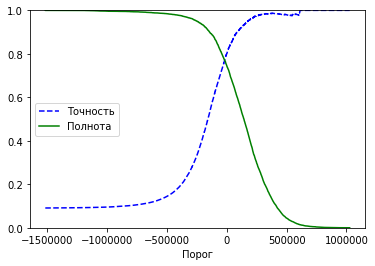

In [32]:
def plot_precion_recall_vs_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Точность")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Полнота")
    plt.xlabel("Порог")
    plt.legend(loc = "center left")
    plt.ylim([0,1])
    
plot_precion_recall_vs_threshold(precions, recalls, thresholds)
plt.show()

In [33]:
y_train_pred_90 = (y_scores > 40000)
a = precision_score(y_train_5, y_train_pred_90)
b = recall_score(y_train_5, y_train_pred_90)
print('Точность: ', a)
print('Полнота: ', b)

Точность:  0.8531919797188292
Полнота:  0.6828998339789707


Кривая ROC

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

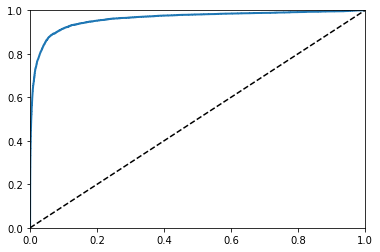

In [35]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot (fpr, tpr, linewidth=2, label=label)
    plt.plot ([0,1], [0,1], 'k--')
    plt.axis ([0,1,0,1])
    plt.xlabel = ('False Positive Rate')
    plt.ylabel = ('True Posistive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [36]:
# Расчитываю площадь под кривой ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.961723292680689

Обучение RandomForrestClassifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5,cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0. , 0. , 0. , ..., 0.9, 0. , 0. ])

In [38]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5,y_scores_forest)

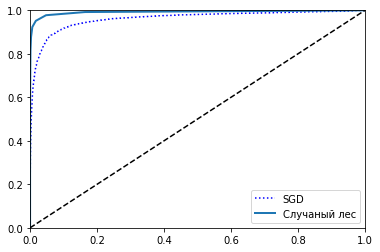

In [39]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Случаный лес")
plt.legend(loc = "lower right")
plt.show()

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9922530887677969

In [41]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5])

In [42]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -276764.56755427,  -661135.13798946,  -637109.35790716,
         -457268.04301667,  -369429.78501489,   363188.85224718,
         -414734.04834889, -1016903.44031228,  -490332.53235949,
         -669560.5279799 ]])

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ov_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ov_clf.fit(x_train, y_train)
ov_clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5])

In [44]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([5])

In [45]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

Оценим классификаторы

In [46]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

array([0.86522695, 0.83374169, 0.80047007])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

array([0.91431714, 0.91034552, 0.90568585])

In [48]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv = 3)
conf_m = confusion_matrix(y_train, y_train_pred)
conf_m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and defa

array([[5719,    3,   28,    9,   10,   49,   47,   10,   45,    3],
       [   1, 6481,   41,   23,    7,   38,   10,    9,  120,   12],
       [  47,   39, 5335,  104,   84,   25,   88,   61,  160,   15],
       [  39,   43,  130, 5344,    3,  240,   35,   57,  139,  101],
       [  18,   29,   34,    8, 5404,    8,   49,   28,   88,  176],
       [  73,   37,   32,  207,   77, 4583,  116,   25,  182,   89],
       [  27,   24,   46,    2,   41,   90, 5639,    7,   42,    0],
       [  22,   20,   63,   28,   60,   12,    4, 5825,   17,  214],
       [  47,  159,   71,  147,   17,  159,   52,   27, 5030,  142],
       [  40,   31,   28,   81,  182,   37,    2,  217,   84, 5247]],
      dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

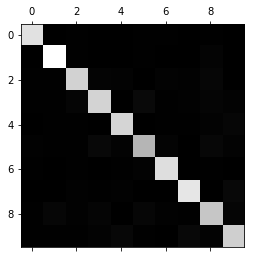

In [49]:
plt.matshow(conf_m, cmap = plt.cm.gray)
plt.show

In [50]:
rows_sum = conf_m.sum(axis = 1, keepdims = True)
norm_rows_sum = conf_m/rows_sum

<function matplotlib.pyplot.show(*args, **kw)>

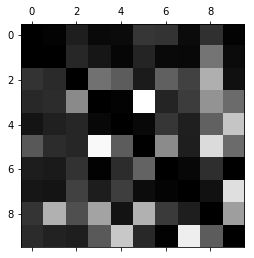

In [51]:
np.fill_diagonal(norm_rows_sum, 0)
plt.matshow(norm_rows_sum, cmap = plt.cm.gray)
plt.show

In [52]:
# cl_a, cl_b = 3, 5
# x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
# x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
# x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
# x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
# plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
# plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
# plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
# save_fig("error_analysis_digits_plot")
# plt.show()|

In [53]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==0)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
knn_clf.predict([some_digit])

array([[False, False]])

Мультивыходовая классификация

In [55]:
#Зашумляем имеющийся набор изоюражений
noise = np.random.randint(0,100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0,100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test